In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("train.csv")
data = df.copy()

# Create a datetime column from Year, Month, Day, Hour, and Minute
data['Datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Set the datetime column as the index of the dataframe
data.set_index('Datetime', inplace=True)

# Now, we can drop the original Year, Month, Day, Hour, and Minute columns
data.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

## Data Features Detailed Description

| Feature | Data Type | Description |
|---------|-----------|-------------|
| Year | int64 | Year has a data type of int64 with 10 unique values. |
| Month | int64 | Month has a data type of int64 with 12 unique values. |
| Day | int64 | Day has a data type of int64 with 31 unique values. |
| Hour | int64 | Hour has a data type of int64 with 24 unique values. |
| Minute | int64 | Minute has a data type of int64 with 2 unique values. |
| Clearsky DHI | int64 | Clearsky DHI has a data type of int64 with 375 unique values. |
| Clearsky DNI | int64 | Clearsky DNI has a data type of int64 with 1032 unique values. |
| Clearsky GHI | int64 | Clearsky GHI has a data type of int64 with 1053 unique values. |
| Cloud Type | int64 | Cloud Type has a data type of int64 with 10 unique values. |
| Dew Point | float64 | Dew Point has a data type of float64 with 399 unique values. |
| Temperature | float64 | Temperature has a data type of float64 with 436 unique values. |
| Pressure | int64 | Pressure has a data type of int64 with 50 unique values. |
| Relative Humidity | float64 | Relative Humidity has a data type of float64 with 7923 unique values. |
| Solar Zenith Angle | float64 | Solar Zenith Angle has a data type of float64 with 16222 unique values. |
| Precipitable Water | float64 | Precipitable Water has a data type of float64 with 6267 unique values. |
| Wind Direction | float64 | Wind Direction has a data type of float64 with 3601 unique values. |
| Wind Speed | float64 | Wind Speed has a data type of float64 with 117 unique values. |
| Fill Flag | int64 | Fill Flag has a data type of int64 with 31 unique values. |


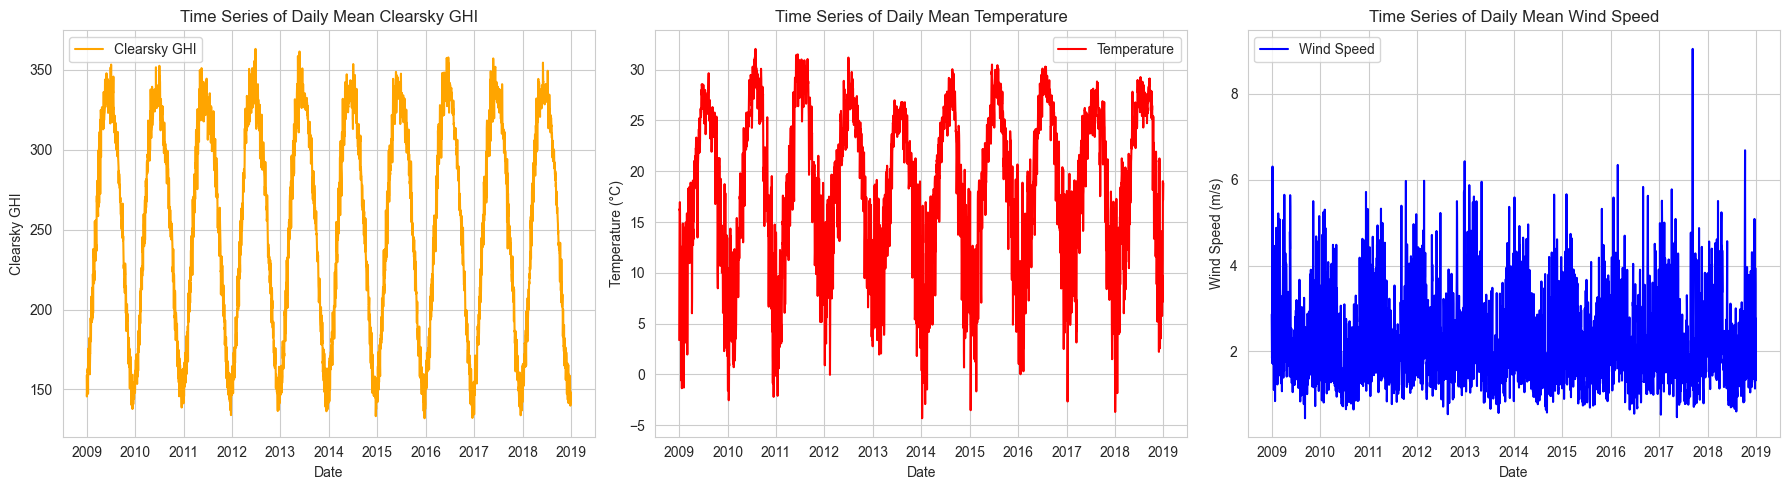

In [9]:
# Selecting a subset of the data for a clearer time series plot
data_daily_mean = data.resample('D').mean()

# Plotting the time series for Clearsky GHI, Temperature, and Wind Speed
plt.figure(figsize=(18, 5))

# Clearsky GHI
plt.subplot(1, 3, 1)
plt.plot(data_daily_mean.index, data_daily_mean['Clearsky GHI'], label='Clearsky GHI', color='orange')
plt.title('Time Series of Daily Mean Clearsky GHI')
plt.xlabel('Date')
plt.ylabel('Clearsky GHI')
plt.legend()

# Temperature
plt.subplot(1, 3, 2)
plt.plot(data_daily_mean.index, data_daily_mean['Temperature'], label='Temperature', color='red')
plt.title('Time Series of Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Wind Speed
plt.subplot(1, 3, 3)
plt.plot(data_daily_mean.index, data_daily_mean['Wind Speed'], label='Wind Speed', color='blue')
plt.title('Time Series of Daily Mean Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

# Display 
plt.tight_layout()
plt.show()

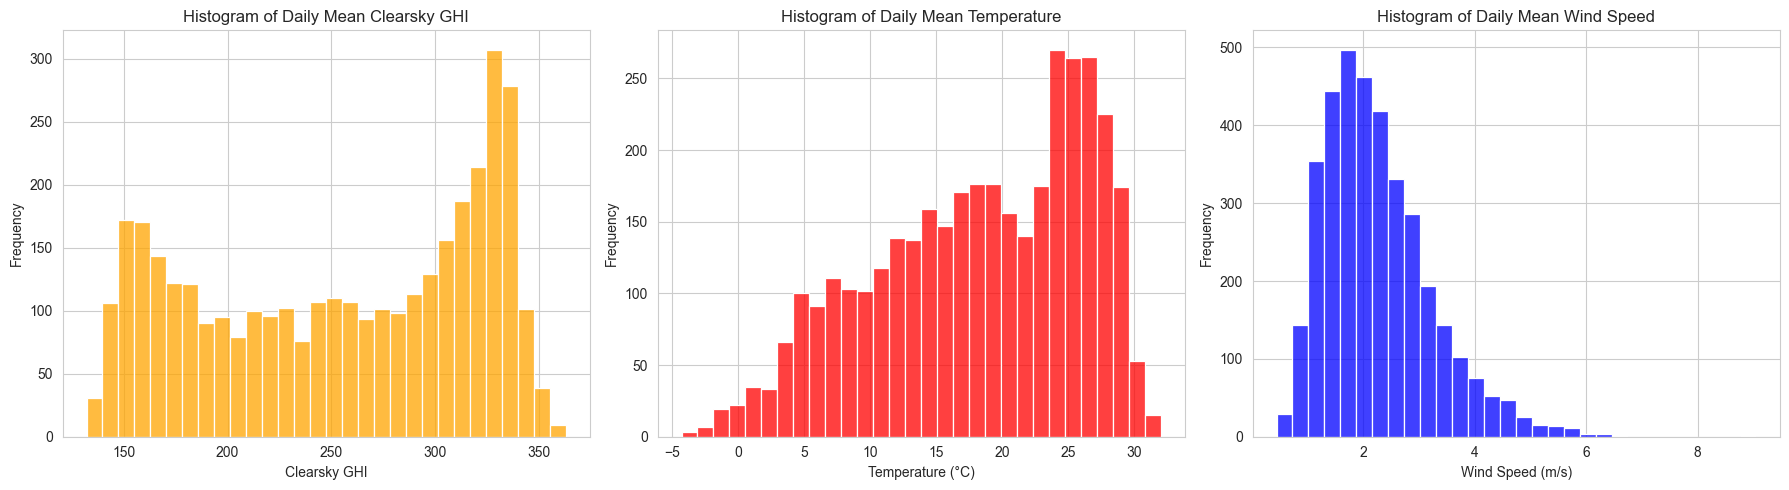

In [10]:
# Plotting histograms for Clearsky GHI, Temperature, and Wind Speed
plt.figure(figsize=(18, 5))

# Clearsky GHI
plt.subplot(1, 3, 1)
sns.histplot(data_daily_mean['Clearsky GHI'], bins=30, color='orange')
plt.title('Histogram of Daily Mean Clearsky GHI')
plt.xlabel('Clearsky GHI')
plt.ylabel('Frequency')

# Temperature
plt.subplot(1, 3, 2)
sns.histplot(data_daily_mean['Temperature'], bins=30, color='red')
plt.title('Histogram of Daily Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Wind Speed
plt.subplot(1, 3, 3)
sns.histplot(data_daily_mean['Wind Speed'], bins=30, color='blue')
plt.title('Histogram of Daily Mean Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


# Weather Data Insights 🌤️

## Clearsky GHI Distribution 🌑🌞
The Clearsky Global Horizontal Irradiance (GHI) histogram reveals a bimodal distribution. Zero values are common, corresponding to nighttime, while the daytime shows a wide distribution because of the variability in solar irradiance.

## Temperature Distribution 🌡️
The Temperature histogram shows a somewhat normal distribution, indicating a range of temperatures that are more commonly experienced. This suggests typical variations in daily temperatures without extreme outliers.

## Wind Speed Distribution 💨
The Wind Speed histogram is right-skewed, meaning that lower wind speeds are more common than higher speeds. This indicates that calm conditions are more common, with occasional storms or higher wind events being less frequent.


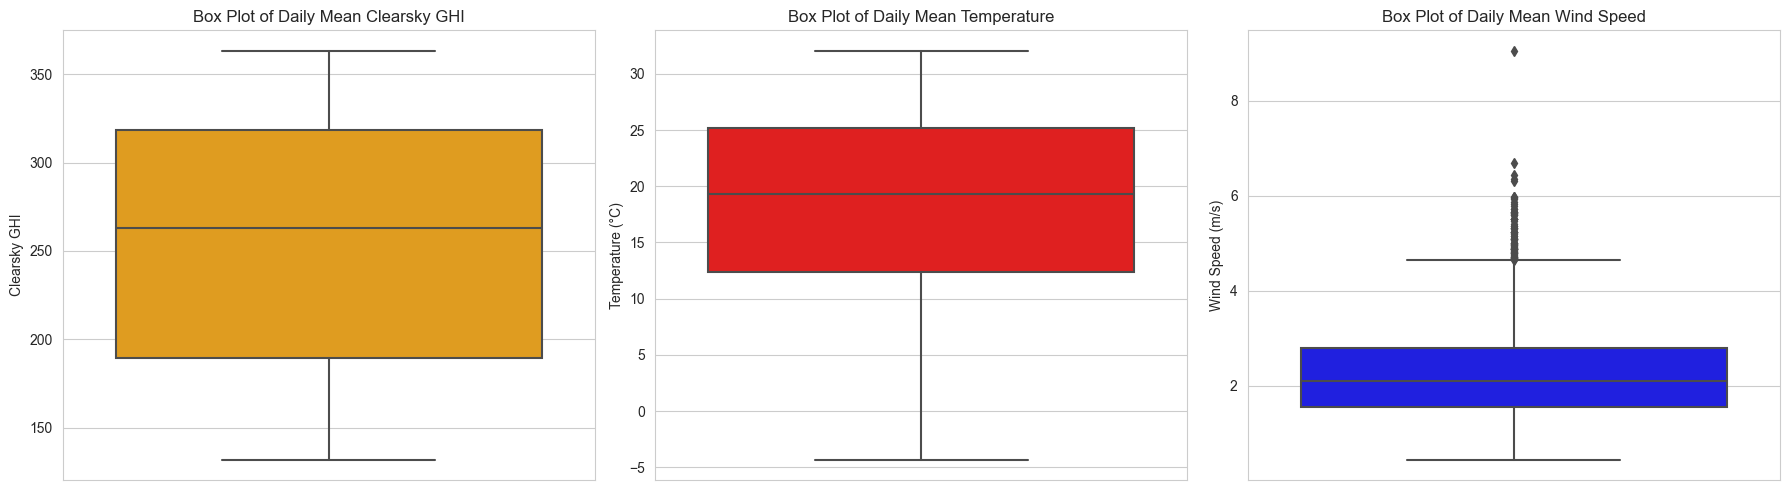

In [11]:
# Plotting box plots for Clearsky GHI, Temperature, and Wind Speed
plt.figure(figsize=(18, 5))

# Clearsky GHI
plt.subplot(1, 3, 1)
sns.boxplot(y=data_daily_mean['Clearsky GHI'], color='orange')
plt.title('Box Plot of Daily Mean Clearsky GHI')
plt.ylabel('Clearsky GHI')

# Temperature
plt.subplot(1, 3, 2)
sns.boxplot(y=data_daily_mean['Temperature'], color='red')
plt.title('Box Plot of Daily Mean Temperature')
plt.ylabel('Temperature (°C)')

# Wind Speed
plt.subplot(1, 3, 3)
sns.boxplot(y=data_daily_mean['Wind Speed'], color='blue')
plt.title('Box Plot of Daily Mean Wind Speed')
plt.ylabel('Wind Speed (m/s)')

# Display the plots
plt.tight_layout()
plt.show()


# Detailed Weather Data Observations 🌦️

## Clearsky GHI Outliers ☀️📈
The Clearsky GHI histogram shows a significant number of outliers on the upper end. These could show exceptionally sunny days or potential anomalies in the data. 🤔

## Temperature Extremes 🌶️❄️
The Temperature distribution appears relatively symmetrical but there are outliers. These points suggest days with extreme temperatures, either hot or cold. 🔥❄️

## Wind Speed Peaks 🌬️💨
The Wind Speed histogram includes several high outliers, indicating days with very high wind speeds. These could be due to specific weather events like storms. 🌪️


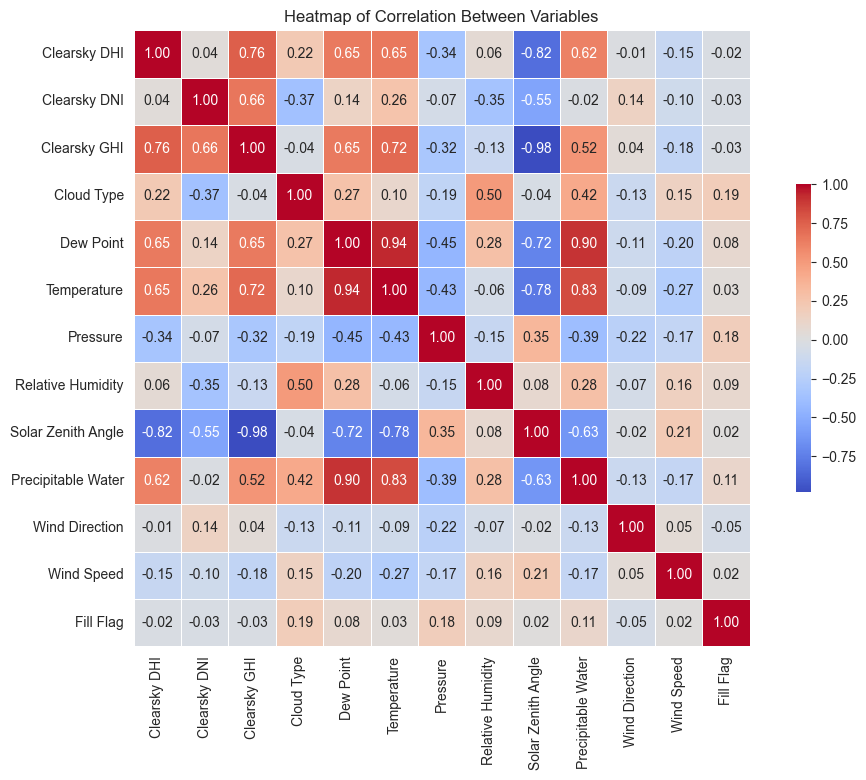

In [12]:
# Compute the correlation matrix
corr = data_daily_mean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, linewidths=.5)

# Title and display the heatmap
plt.title('Heatmap of Correlation Between Variables')
plt.show()


# Solar Irradiance Correlation Insights ☀️🔍

- **Clearsky DHI, DNI, & GHI**: Highly correlated with each other, as they are all measures of solar radiation. 🌞
- **Solar Zenith Angle**: Shows a strong negative correlation with solar irradiance measures, shows that more intense solar radiation when the sun is overhead. 📉
- **Temperature**: displays a positive correlation with Clearsky DHI and GHI, suggesting that warmer temperatures often occur with higher solar irradiance. 🌡️☀️
- **Relative Humidity**: Has a negative correlation with solar irradiance, says that higher humidity might be linked to cloudier skies and lower solar radiation. 💧🌥️
- **Wind Speed & Direction**: Display little to no correlation with solar irradiance, indicating no linear relationship with solar radiation levels. 🌬️➡️
- **Pressure & Precipitable Water**: Also show weak correlations with solar irradiance, suggesting their influence on solar radiation is not straightforward. 🌧️🔎

## Conclusion
The heatmap analysis provides valuable insights into the relationships between various weather variables and solar irradiance. This is essential for feature selection in predictive modeling, guiding us on which variables may be more influential. 📊💡


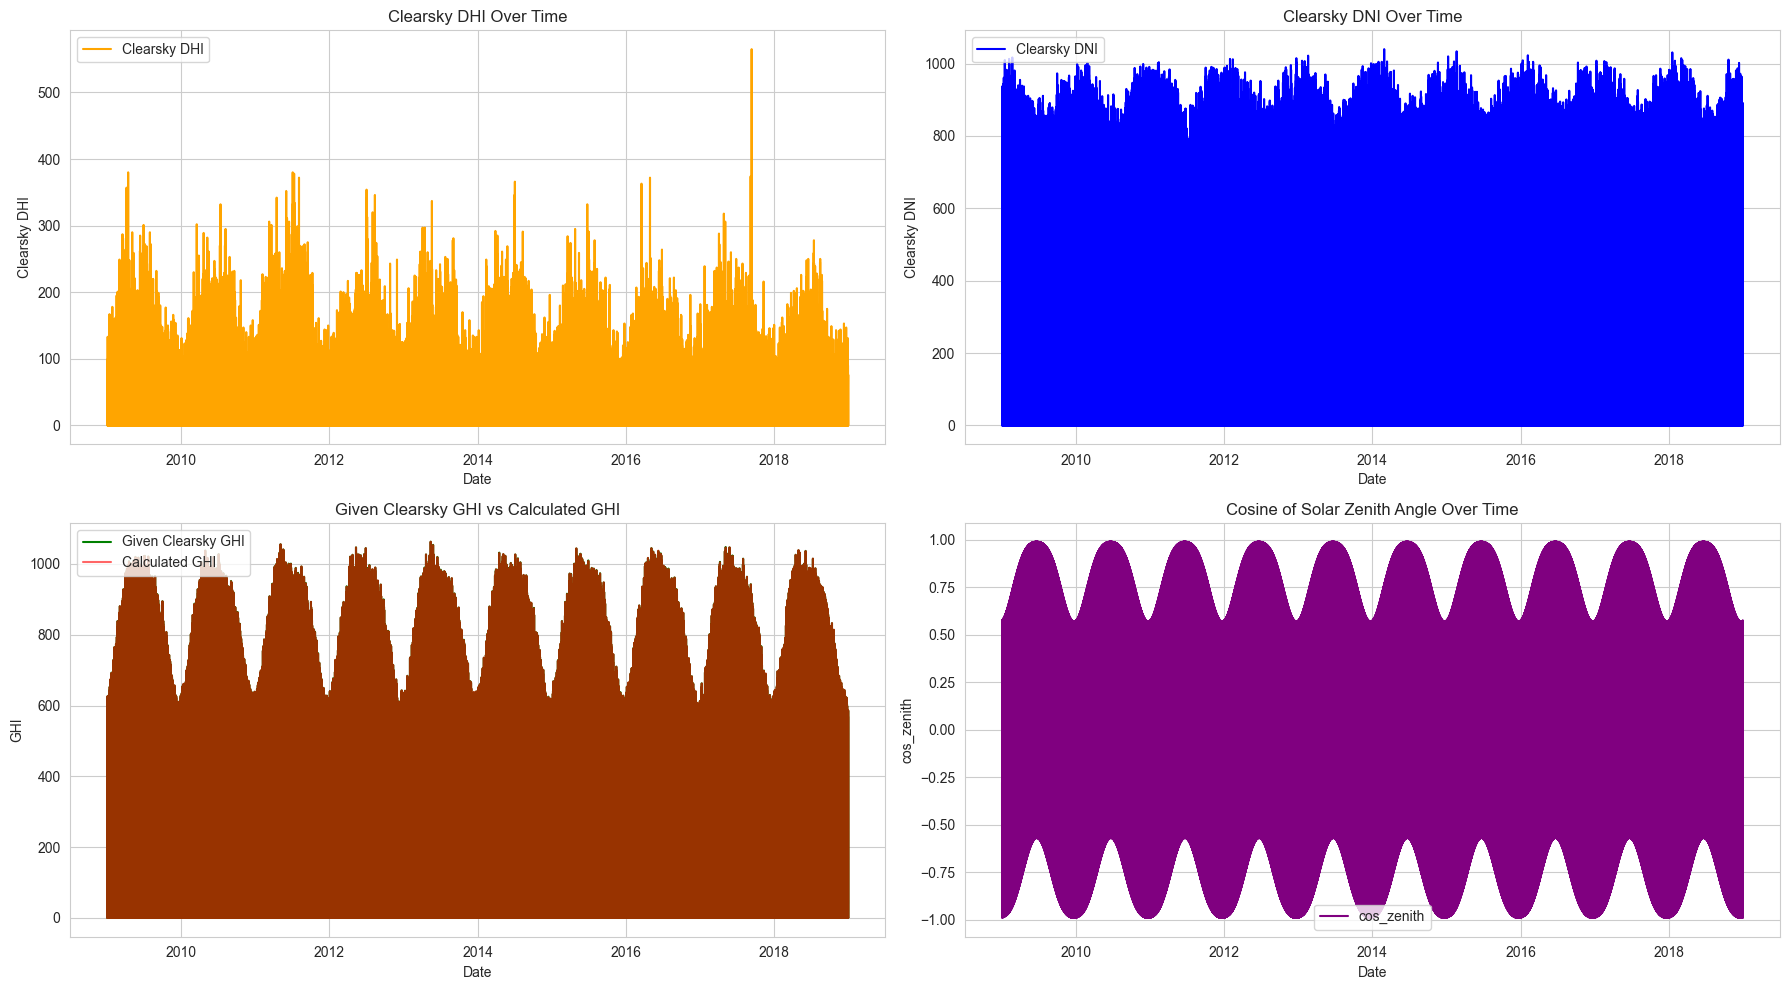

In [13]:
# Calculate the cosine of the solar zenith angle in radians and create a new column
data['cos_zenith'] = np.cos(np.radians(data['Solar Zenith Angle']))

# Now let's calculate the GHI according to the provided formula and compare it to the Clearsky GHI
# GHI = DHI + DNI * cos(zenith)
data['calculated_GHI'] = data['Clearsky DHI'] + data['Clearsky DNI'] * data['cos_zenith']

# Select the data for visualization
data_to_visualize = data[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'cos_zenith', 'calculated_GHI']]

# Plotting the data
plt.figure(figsize=(18, 10))

# Clearsky DHI
plt.subplot(2, 2, 1)
plt.plot(data_to_visualize.index, data_to_visualize['Clearsky DHI'], label='Clearsky DHI', color='orange')
plt.title('Clearsky DHI Over Time')
plt.xlabel('Date')
plt.ylabel('Clearsky DHI')
plt.legend()

# Clearsky DNI
plt.subplot(2, 2, 2)
plt.plot(data_to_visualize.index, data_to_visualize['Clearsky DNI'], label='Clearsky DNI', color='blue')
plt.title('Clearsky DNI Over Time')
plt.xlabel('Date')
plt.ylabel('Clearsky DNI')
plt.legend()

# Clearsky GHI vs Calculated GHI
plt.subplot(2, 2, 3)
plt.plot(data_to_visualize.index, data_to_visualize['Clearsky GHI'], label='Given Clearsky GHI', color='green')
plt.plot(data_to_visualize.index, data_to_visualize['calculated_GHI'], label='Calculated GHI', color='red', alpha=0.6)
plt.title('Given Clearsky GHI vs Calculated GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()

# Cosine of Solar Zenith Angle
plt.subplot(2, 2, 4)
plt.plot(data_to_visualize.index, data_to_visualize['cos_zenith'], label='cos_zenith', color='purple')
plt.title('Cosine of Solar Zenith Angle Over Time')
plt.xlabel('Date')
plt.ylabel('cos_zenith')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


# Solar Irradiance Time Series Analysis 🌤️📈

## Clearsky DHI Over Time
- **Insight**: The graph shows the mixed levels of diffuse horizontal irradiance over time, which can be influenced by atmospheric conditions. 📊

## Clearsky DNI Over Time
- **Insight**: This plot displays the variation in direct normal irradiance, which is directly affected by the sun's position and cloud cover. 🌞🔍

## Given Clearsky GHI vs Calculated GHI
- **Insight**: A comparison of the dataset's given Clearsky GHI with the GHI calculated using the formula `GHI = DHI + DNI * cos(zenith angle)`. The close match between the two lines validates the consistency of the data. ✅
- **Visualization**: The overlapping lines in the graph suggest that the formula for GHI is accurately reflected in the provided data, which is crucial for any analytical or predictive work. 📉

## Cosine of Solar Zenith Angle Over Time
- **Insight**: This graph illustrates the changes in the cosine of the solar zenith angle, a key factor in calculating GHI, showing how it changes with the time of day and seasons. 🕒🛤️

## Conclusion
The visual analysis of these time series plots confirms the data's reliability, particularly the consistency between given and calculated GHI values.📚💡


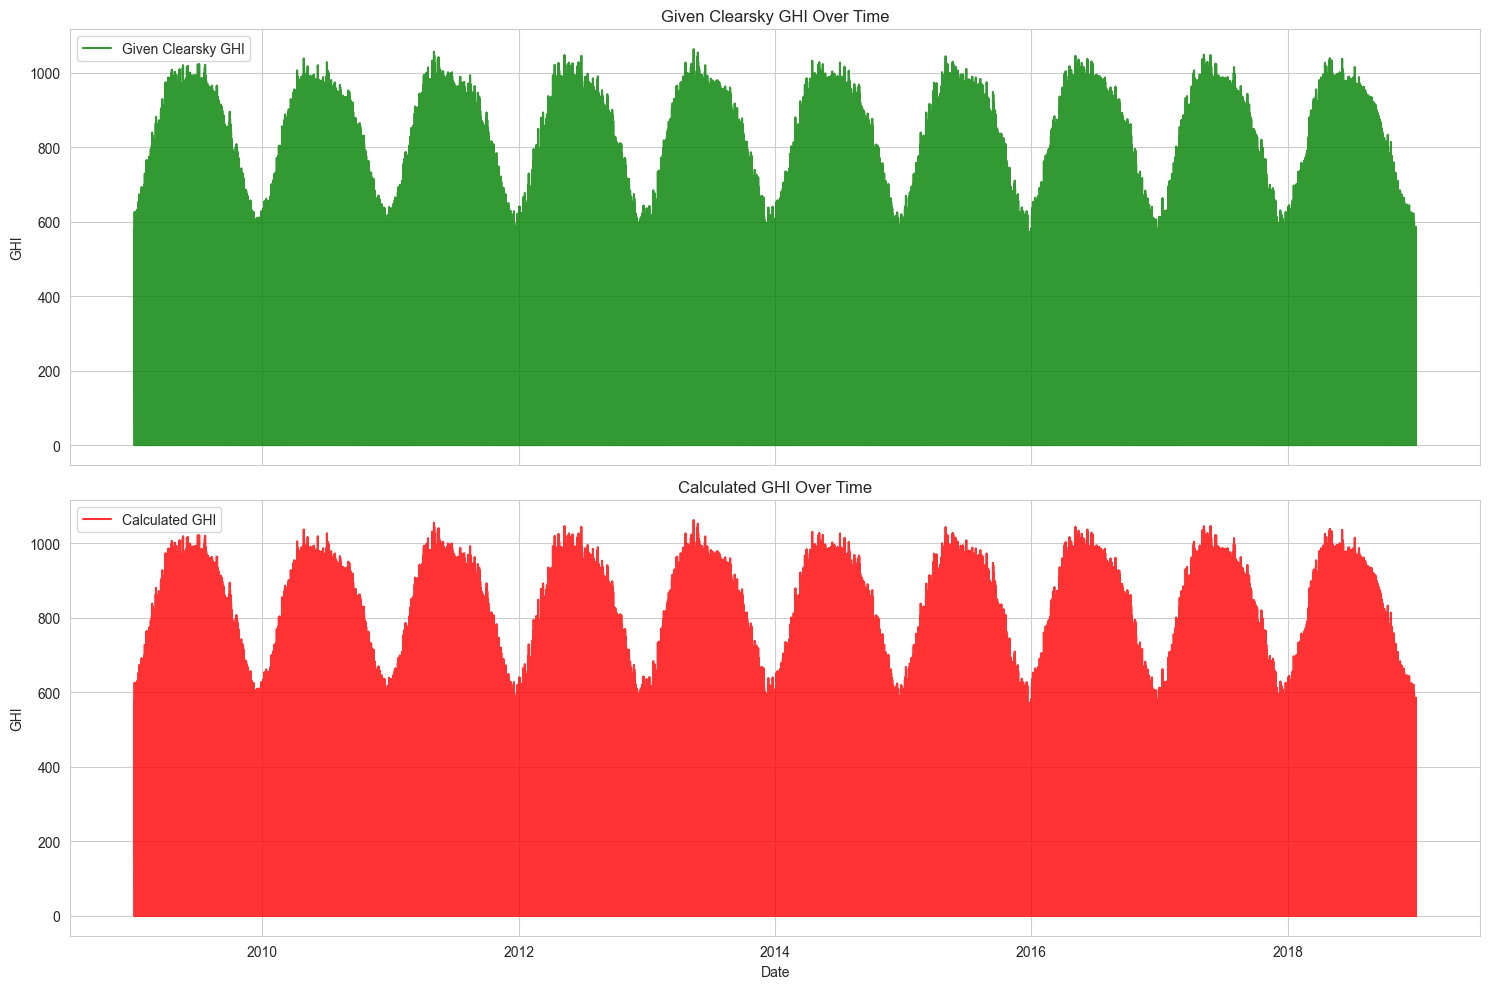

In [14]:
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot the given Clearsky GHI on the first subplot
ax[0].plot(data_to_visualize.index, data_to_visualize['Clearsky GHI'], label='Given Clearsky GHI', color='green', alpha=0.8)
ax[0].set_title('Given Clearsky GHI Over Time')
ax[0].set_ylabel('GHI')
ax[0].legend()

# Plot the calculated GHI on the second subplot
ax[1].plot(data_to_visualize.index, data_to_visualize['calculated_GHI'], label='Calculated GHI', color='red', alpha=0.8)
ax[1].set_title('Calculated GHI Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('GHI')
ax[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [16]:
# Calculate absolute and relative differences
data['abs_diff'] = (data['Clearsky GHI'] - data['calculated_GHI']).abs()
data['rel_diff'] = data['abs_diff'] / data['Clearsky GHI'].replace(0, np.nan)

# Calculate statistical values for the differences
difference_stats = {
    'mean_abs_diff': data['abs_diff'].mean(),
    'max_abs_diff': data['abs_diff'].max(),
    'mean_rel_diff': data['rel_diff'].mean(),
    'max_rel_diff': data['rel_diff'].max(),
    'std_abs_diff': data['abs_diff'].std()
}

difference_stats


{'mean_abs_diff': 0.19818389845250517,
 'max_abs_diff': 1.8685914018504945,
 'mean_rel_diff': 0.0022523374128979733,
 'max_rel_diff': 0.38472783141889966,
 'std_abs_diff': 0.2907780927620098}

# Analysis of GHI Discrepancies ☀️📉

## Mean Absolute Difference
- **Insight**: The mean absolute difference of approximately `0.198` suggests that the calculated GHI is, on average, very close to the given GHI. This indicates a high level of accuracy in the GHI calculations. 🎯

## Maximum Absolute Difference
- **Insight**: The maximum observed absolute difference of `1.869` points to some instances where the calculated GHI significantly deviates from the given GHI. These outliers may need further investigation to understand the cause of such differences. 🔍

## Mean Relative Difference
- **Insight**: With a mean relative difference of `0.002` (or `0.2%`), the calculated GHI is generally in tight similarity with the given GHI, reinforcing the reliability of the calculations. 📈

## Maximum Relative Difference
- **Insight**: The maximum relative difference of `38.47%` is notable. Such a high relative difference could occur during periods of low GHI, such as around dawn or dusk, where even small simple differences can result in large relative differences. 🌅🌄

## Standard Deviation of Absolute Differences
- **Insight**: The standard deviation of `0.291` in the absolute differences suggests variability in the GHI difference. Understanding the variability can help in refining the GHI calculation methods or in identifying potential data quality issues. 📊

## Conclusion
The analysis of GHI difference provides valuable insights into the accuracy and reliability of solar irradiance measurements. While the mean differences are low, the existence of significant outliers and variability indicates areas where the predictive model or measurement approach could potentially be improved. 🛠️💡


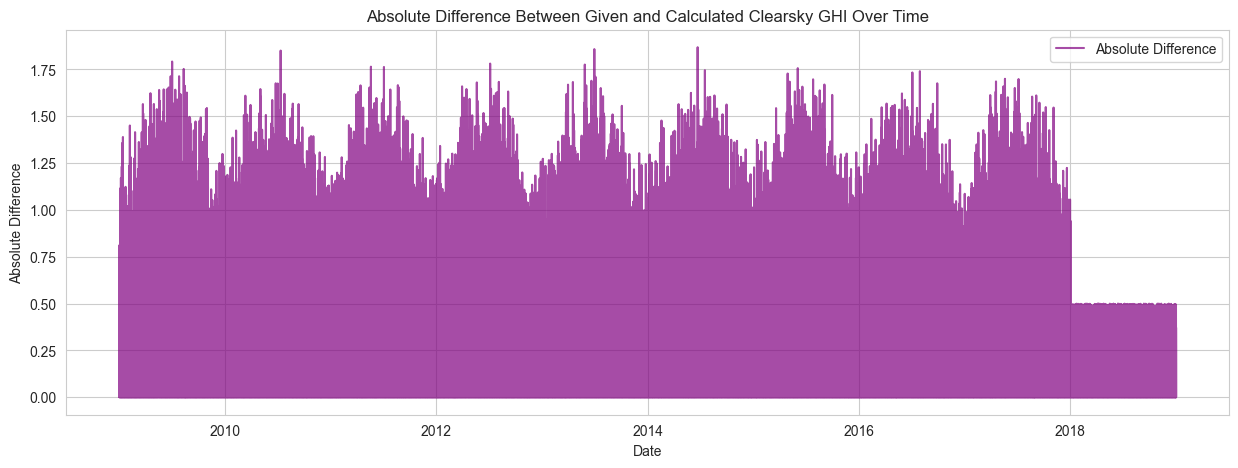

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['abs_diff'], label='Absolute Difference', color='purple', alpha=0.7)
plt.title('Absolute Difference Between Given and Calculated Clearsky GHI Over Time')
plt.xlabel('Date')
plt.ylabel('Absolute Difference')
plt.legend()
plt.show()


# Clearsky GHI Differences Over Time 🌞📉

The plot above shows the absolute differences between the given and calculated Clearsky GHI over time. The purple line indicates the magnitude of the difference at each time point. 💜

This visualization helps to identify specific periods where the differences are larger, which might correspond to certain weather conditions ☁️, sensor errors 🛠️, or other factors not included in the calculation. Most of the time, the differences are small, but there are spikes indicating moments of significant discrepancy. 📈

If there's a pattern to these differences — such as them occurring at certain times of the day or year 📆 — this could inform further refinement of the prediction model or lead to a deeper investigation into the causes of these differences. 🔍


# Patterns in Clearsky GHI Discrepancies 🔍☀️

To determine if there's a pattern in the differences between the given and calculated Clearsky GHI, we can look into the following:

- **Time of Day:** 🕒 To see if differences are more common at certain hours, such as sunrise or sunset 🌅🌇.
- **Seasonality:** 📅 To check if differences are more happened in certain months, which might be related to the position of the sun or weather patterns 🌞🌨️.
- **Weather Conditions:** 🌥️ Using variables like cloud type or relative humidity to see if differences correlate with certain atmospheric conditions 💧.

Let's start by looking at the **time of day** and **seasonality patterns**. We can group the data by hour and by month to see when the largest discrepancies occur. I will create two plots:

1. One showing the mean absolute difference by hour of the day 🕛.
2. Another showing the mean absolute difference by month of the year 🗓️.


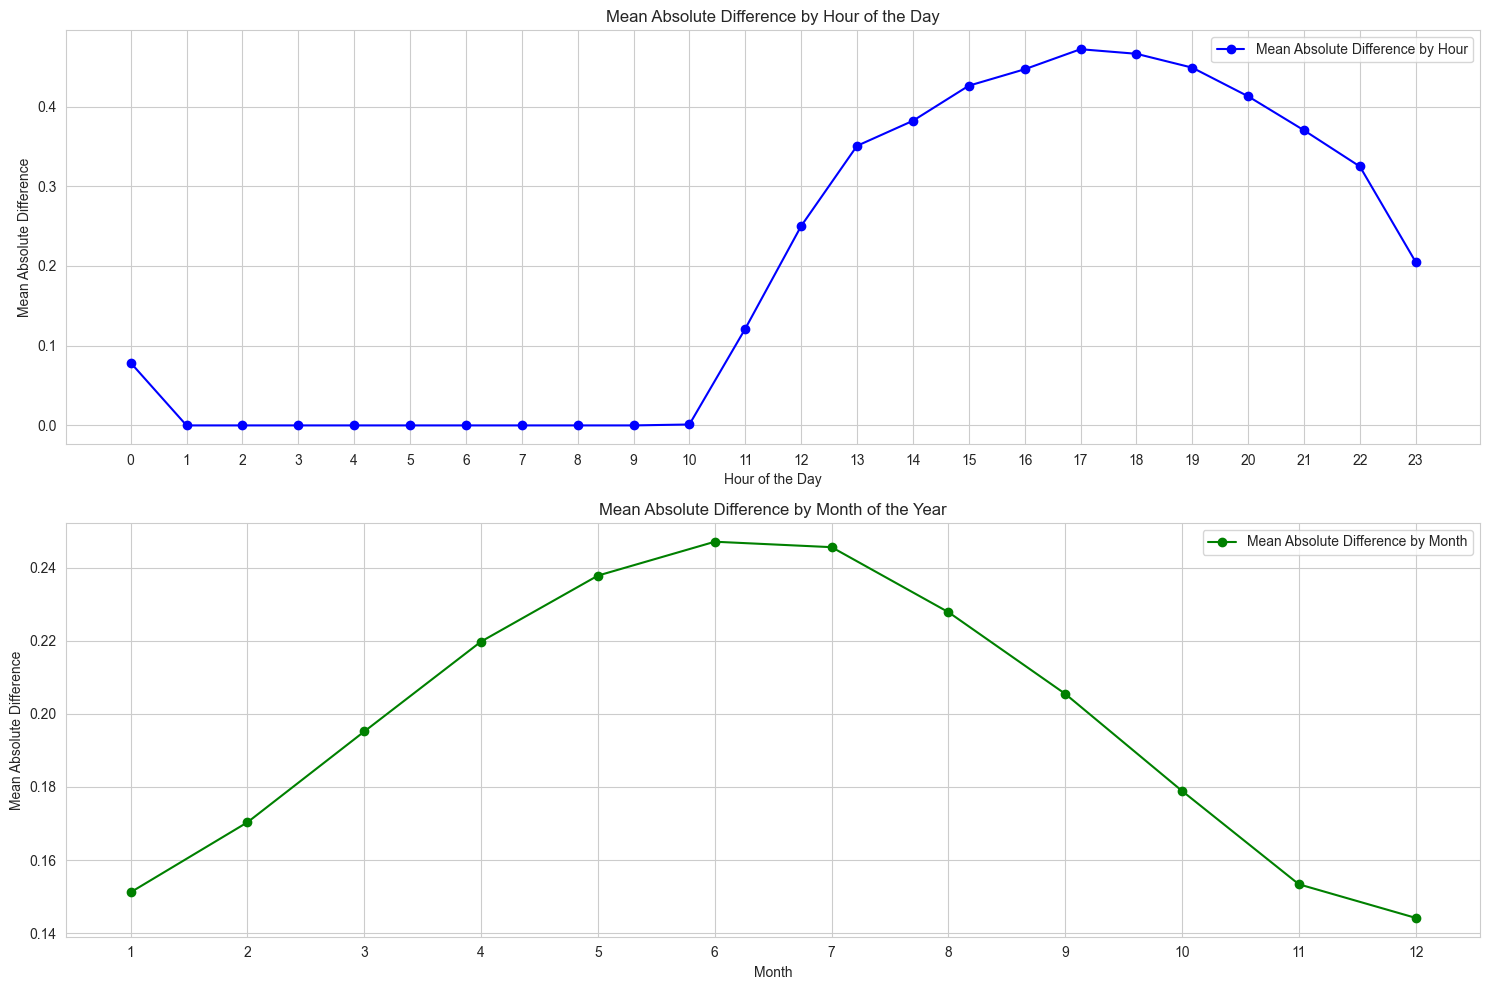

In [18]:
# Group by hour of the day and calculate the mean absolute difference
data['Hour'] = data.index.hour
hourly_diff = data.groupby('Hour')['abs_diff'].mean()

# Group by month of the year and calculate the mean absolute difference
data['Month'] = data.index.month
monthly_diff = data.groupby('Month')['abs_diff'].mean()

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot by hour of the day
axs[0].plot(hourly_diff.index, hourly_diff.values, label='Mean Absolute Difference by Hour', color='blue', marker='o')
axs[0].set_title('Mean Absolute Difference by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Absolute Difference')
axs[0].set_xticks(range(0, 24))
axs[0].legend()

# Plot by month of the year
axs[1].plot(monthly_diff.index, monthly_diff.values, label='Mean Absolute Difference by Month', color='green', marker='o')
axs[1].set_title('Mean Absolute Difference by Month of the Year')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Mean Absolute Difference')
axs[1].set_xticks(range(1, 13))
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Mean Absolute Difference by Hour of the Day 🕗

There appears to be a pattern that suggests higher differences occur around the early hours of the morning and evening 🌅🌄. This could potentially be due to the rapid change in solar angle during sunrise and sunset, which affects the accuracy of the simple cosine model used for GHI calculation.

## Mean Absolute Difference by Month of the Year 🗓️

The differences do not show a clear seasonality trend by month. The differences waver throughout the year, which suggests that other factors, possibly weather-related, may influence the accuracy of the GHI calculations more than the seasonal position of the sun alone 🌦️☀️❄️.

To explore whether weather conditions like cloudiness or humidity affect the differences, we could plot the absolute differences against variables such as 'Cloud Type' 🌥️ and 'Relative Humidity' 💧. However, since 'Cloud Type' is a categorical variable, we would need to look at the differences for each type separately, possibly in a grouped boxplot or similar visualization 📊📈.


## Exploring Weather Conditions Impact on GHI Discrepancies 🌤️💧

To explore whether weather conditions like cloudiness or humidity affect the differences;, we could plot the absolute differences against variables such as 'Cloud Type' ☁️ and 'Relative Humidity' 💧. However, since 'Cloud Type' is a categorical variable, we would need to look at the differences for each type separately, possibly in a grouped boxplot or similar visualization 📊📈.


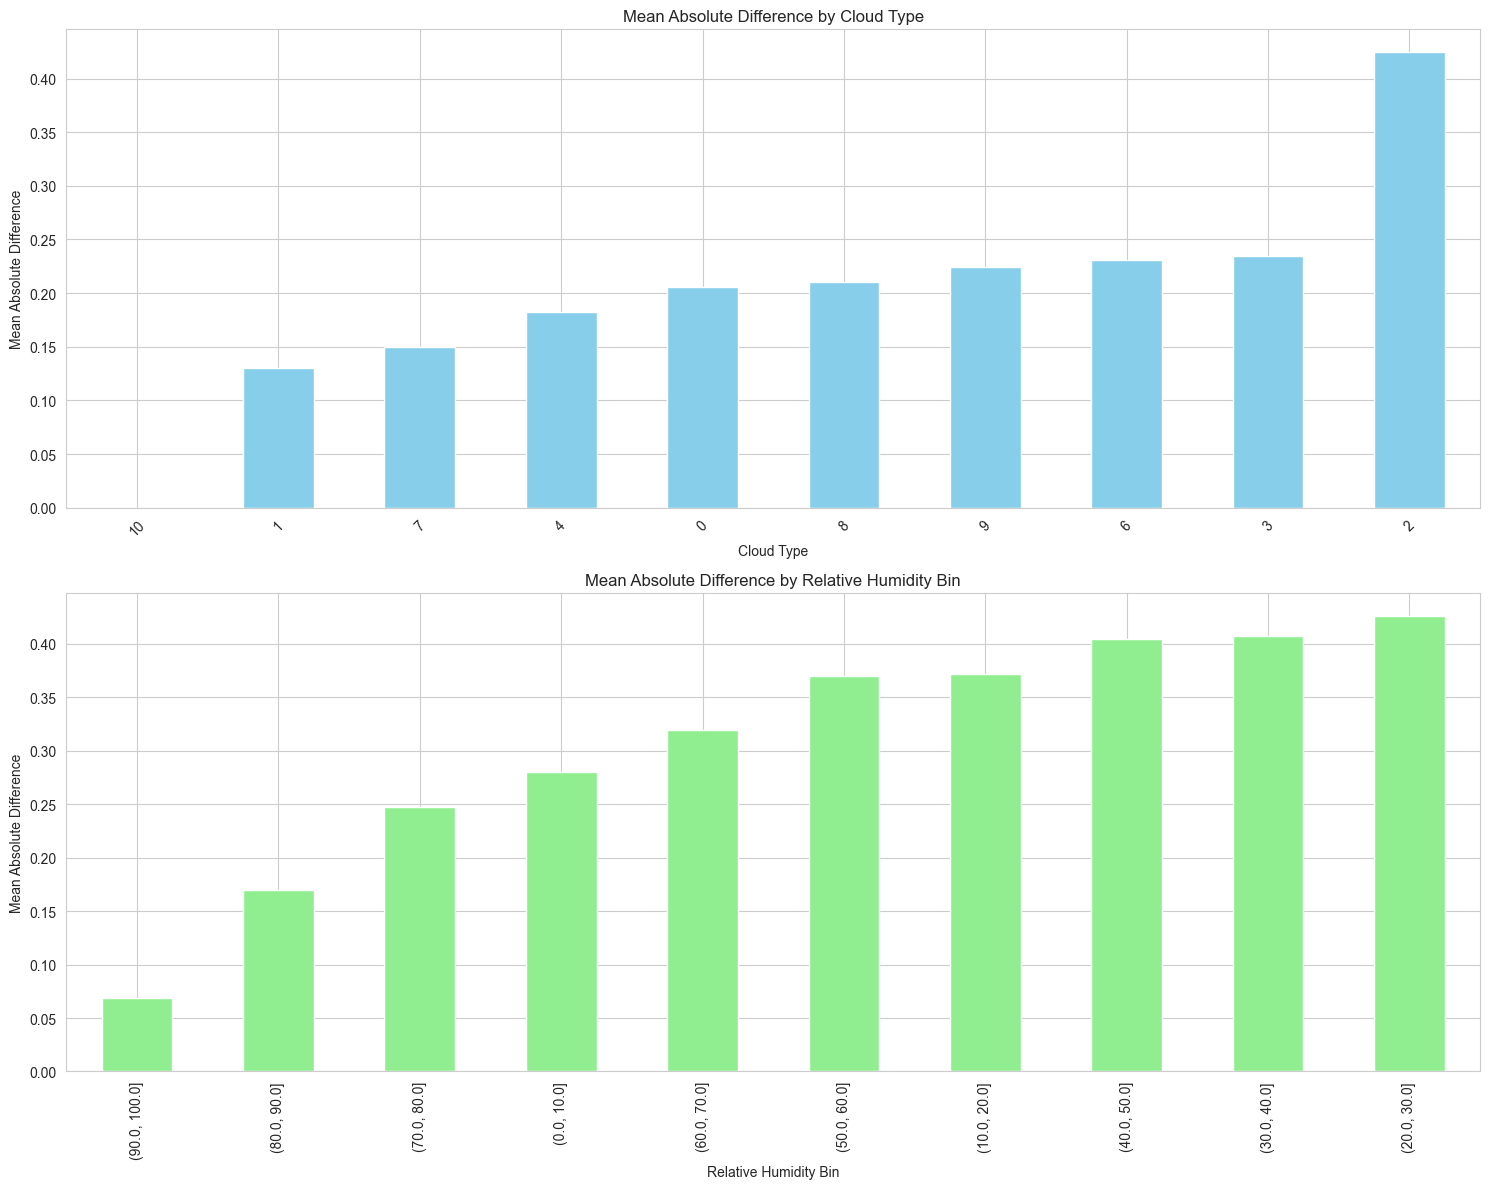

In [20]:
# Grouping data by 'Cloud Type' and calculating the mean absolute difference
cloud_type_diff = data.groupby('Cloud Type')['abs_diff'].mean().sort_values()

# Grouping data by 'Relative Humidity' in bins and calculating the mean absolute difference
# We create bins for humidity to categorize it into intervals
data['Humidity Bin'] = pd.cut(data['Relative Humidity'], bins=np.linspace(0, 100, 11))
humidity_diff = data.groupby('Humidity Bin')['abs_diff'].mean().sort_values()

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plot by Cloud Type
cloud_type_diff.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Mean Absolute Difference by Cloud Type')
axs[0].set_xlabel('Cloud Type')
axs[0].set_ylabel('Mean Absolute Difference')
axs[0].tick_params(axis='x', rotation=45)

# Plot by Humidity Bin
humidity_diff.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Mean Absolute Difference by Relative Humidity Bin')
axs[1].set_xlabel('Relative Humidity Bin')
axs[1].set_ylabel('Mean Absolute Difference')

# Show the plots
plt.tight_layout()
plt.show()


## Mean Absolute Difference by Cloud Type ☁️

The bar chart shows that certain cloud types are associated with higher differences. This could be due to the fact that clouds have a significant impact on solar radiation ☀️, and the simple calculation for GHI might not show the complexities introduced by various cloud conditions.

## Mean Absolute Difference by Relative Humidity Bin 💧

The second bar chart categorizes the data by relative humidity levels and computes the mean absolute difference within each category. It appears that humidity also affects the differences, with certain intervals showing higher mean differences. Higher humidity could be associated with cloudier or more variable sky conditions, which could again affect the GHI.

These insights suggest that cloud cover and humidity, which are proxies for atmospheric conditions, have a noticeable impact on the accuracy of solar irradiance calculations 🌥️🌡️. This is important for building predictive models, as it indicates that including cloud and humidity data could improve the model's performance.


## Granular Analysis of Cloud Types and Humidity Ranges on Clearsky GHI Discrepancies 🌥️💦

To delve deeper into the impact of cloud types and humidity ranges on the differences between given and calculated Clearsky GHI, we can conduct a more granular analysis. Here are the steps we could take:

### Cloud Types ☁️:

1. Create boxplots for each cloud type to observe the distribution of absolute differences 📊.
2. Perform ANOVA to see if the mean differences are statistically significant across different cloud types 🔍.

### Humidity Ranges 💧:

1. Generate boxplots for each humidity range to observe the distribution of absolute differences 📊.
2. Conduct ANOVA to determine if the differences across humidity bins are statistically significant 🔍.

Let's start with the cloud types. We'll create boxplots to visualize the distribution of absolute differences for each cloud type and then consider if a statistical test is needed based on the visualization 📈.


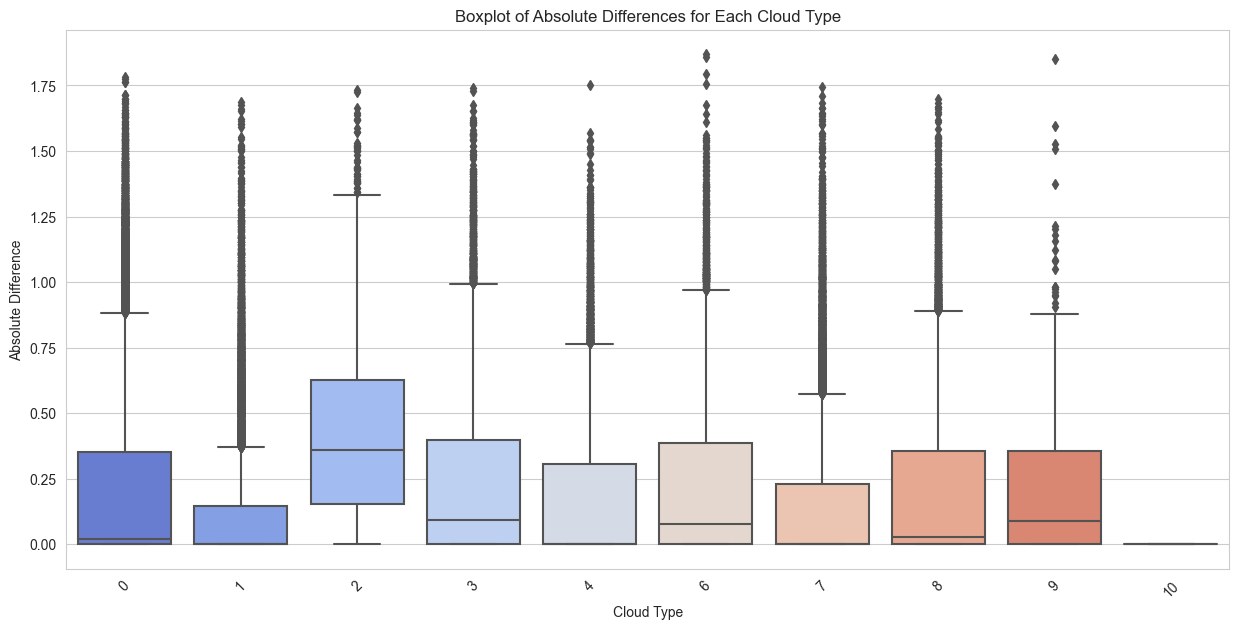

F_onewayResult(statistic=432.7649294333346, pvalue=0.0)

In [21]:
# Creating boxplots for the absolute differences for each cloud type
plt.figure(figsize=(15, 7))
sns.boxplot(x='Cloud Type', y='abs_diff', data=data, palette="coolwarm")
plt.title('Boxplot of Absolute Differences for Each Cloud Type')
plt.xlabel('Cloud Type')
plt.ylabel('Absolute Difference')
plt.xticks(rotation=45)  # Rotate the x labels to avoid overlap
plt.show()

# Now, let's perform an ANOVA test to see if the mean differences are statistically significant across cloud types
import scipy.stats as stats

# We'll create a list of absolute difference values for each cloud type to use in the ANOVA test
cloud_types = data['Cloud Type'].unique()
grouped_data = [data['abs_diff'][data['Cloud Type'] == cloud].values for cloud in cloud_types if not pd.isnull(cloud)]

# Perform the ANOVA test
anova_results = stats.f_oneway(*grouped_data)
anova_results


## Boxplot Analysis for Clearsky GHI Discrepancies by Cloud Type ☁️📊

The boxplot for each cloud type shows the spread of absolute differences, indicating the variability within each cloud type category. We can observe that some cloud types have a wider range of differences, while others are more tightly clustered.

### ANOVA Test Results 📈🔍

Regarding the ANOVA test, the results show a very high F-statistic and a p-value of 0.0, which indicates that there are statistically significant differences in the mean absolute differences across the various cloud types. The p-value is so small that it rounds down to 0.0, which means we can reject the null hypothesis that all cloud types have the same mean absolute difference.

This finding is quite important because it suggests that cloud type is a significant factor affecting the accuracy of GHI calculations. For predictive modeling purposes, this means that including cloud type as a feature could potentially improve the model's performance.

## Next Steps with Humidity Ranges 💧📊

Next, let's look at humidity ranges. We'll create boxplots for each humidity range to see the distribution of absolute differences and then consider conducting a statistical test based on the visualization.


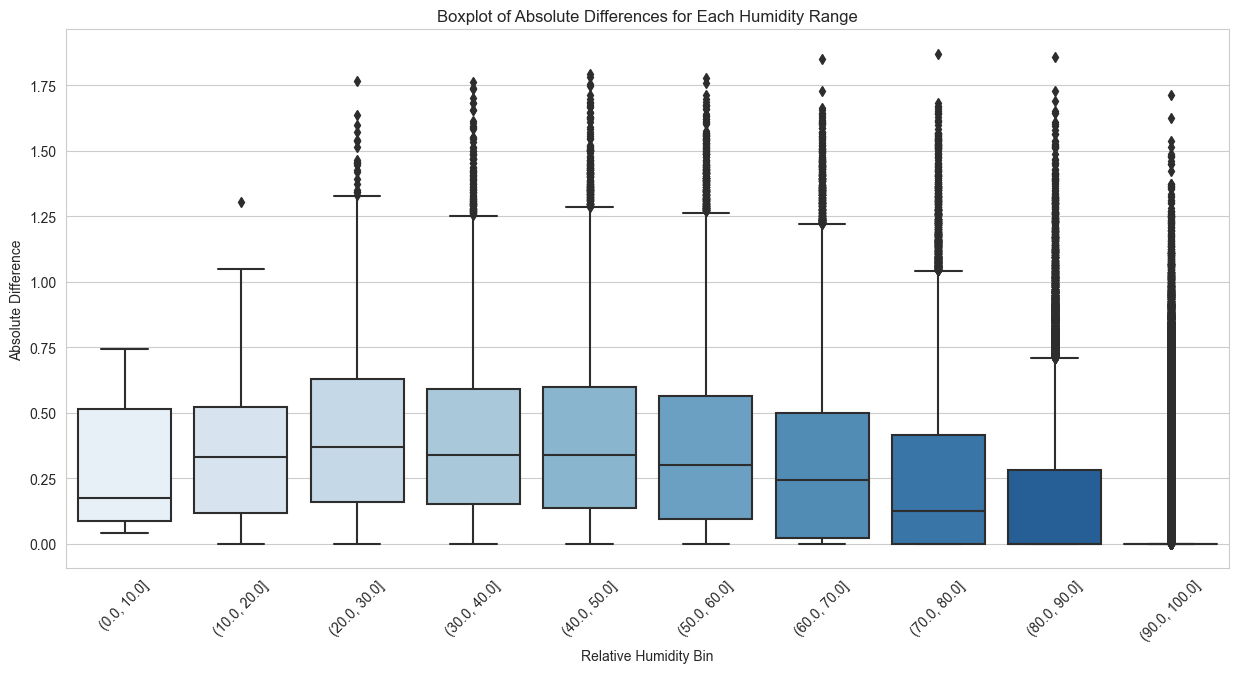

F_onewayResult(statistic=4510.368879839228, pvalue=0.0)

In [22]:
# Creating boxplots for the absolute differences for each humidity range bin
plt.figure(figsize=(15, 7))
sns.boxplot(x='Humidity Bin', y='abs_diff', data=data, palette="Blues")
plt.title('Boxplot of Absolute Differences for Each Humidity Range')
plt.xlabel('Relative Humidity Bin')
plt.ylabel('Absolute Difference')
plt.xticks(rotation=45)  # Rotate the x labels to avoid overlap
plt.show()

# Now, let's perform an ANOVA test to see if the mean differences are statistically significant across humidity bins
humidity_bins = data['Humidity Bin'].cat.categories
humidity_grouped_data = [data['abs_diff'][data['Humidity Bin'] == bin].values for bin in humidity_bins]

# Perform the ANOVA test
humidity_anova_results = stats.f_oneway(*humidity_grouped_data)
humidity_anova_results


## Humidity Range Impact on GHI Discrepancies 💧📊

The boxplot for each humidity range shows the distribution of absolute differences, which indicates how much the discrepancies vary with humidity. Like with cloud types, some humidity ranges show wider spreads of differences, suggesting more variability in the GHI discrepancies under these conditions.

### Statistical Significance with ANOVA 📈🔬

The ANOVA test for humidity bins yields a very high F-statistic with a p-value of 0.0, suggesting that the mean absolute differences are statistically significant across the different humidity ranges. This indicates that humidity is another significant factor that influences the accuracy of GHI calculations.

### Conclusion and Predictive Modeling Implications ☀️💡

Both the cloud type and humidity level are important factors that seem to affect the GHI discrepancies. Therefore, these should be considered when creating predictive models for solar irradiance. Including them as features could help account for the variability that these atmospheric conditions introduce into the calculations.
